## Objective

In this project, we are going to create a model that will predict how much medical cost will be charged for a person based on their features such as:

Age - The age of the person.

Sex - Male or Female.

BMI - Body Mass Index of the person.

Children - Number of children the person has.

Smoker - Whether he/she smokes or not.

Region - Which part of US the person is residing: NorthEast, SouthEast, SouthWest, NorthWest.

## Introduction

A health insurance company can only make money if it collects more than it spends on the medical care of its beneficiaries. On the other hand, even though some conditions are more prevalent for certain segments of the population, medical costs are difficult to predict since most money comes from rare conditions of the patients. The objective of this article is to accurately predict insurance costs based on people’s data, including age, Body Mass Index, smoking or not, etc. Additionally, we will also determine what the most important variable influencing insurance costs is. These estimates could be used to create actuarial tables that set the price of yearly premiums higher or lower according to the expected treatment costs. This is a regression problem.

Predicting healthcare costs for individuals using accurate prediction models is important for various stakeholders beyond health insurers, and for various purposes4. For health insurers and increasingly healthcare delivery systems, accurate forecasts of likely costs can help with general business planning in addition to prioritizing the allocation of scarce care management resources. Moreover, for patients, knowing in advance their likely expenditures for the next year could potentially allow them to choose insurance plans with appropriate deductibles and premiums.

## Loading Our Dataset

In [1]:
import pandas as pd
medical_df = pd.read_csv("insurance.csv")

## Initial Analysis on our Dataset

In [2]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
medical_df.shape

(1338, 7)

In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis (EDA)

## Separating Categorical and Numerical Columns

In [7]:
categorical_columns = [col for col in medical_df.columns if medical_df[col].dtype == 'object']
numerical_columns = [col for col in medical_df.columns if medical_df[col].dtype in ['int', 'float']]

In [8]:
medical_df[categorical_columns].nunique()

sex       2
smoker    2
region    4
dtype: int64

## Replacing the Categorical Values


In [10]:
medical_df.replace({
    'sex': {
        'male': 1,
        'female': 0
    }
}, inplace=True)

medical_df.replace({
    'smoker': {
        'yes': 1,
        'no': 0
    }
}, inplace=True)

medical_df.replace({
    'region': {
        'southeast': 1,
        'southwest': 2,
        'northwest': 3,
        'northeast': 4
    }
}, inplace=True)


## Data Visualization

## Categorical Values SubPlot

C:\Users\antol\AppData\Local\Temp\ipykernel_41436\2941192796.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=medical_df, palette='Set2')  # Added palette for colors
C:\Users\antol\AppData\Local\Temp\ipykernel_41436\2941192796.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=medical_df, palette='Set1')  # Added palette for colors
C:\Users\antol\AppData\Local\Temp\ipykernel_41436\2941192796.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=medical_df, palette='Set3')  # Added pal

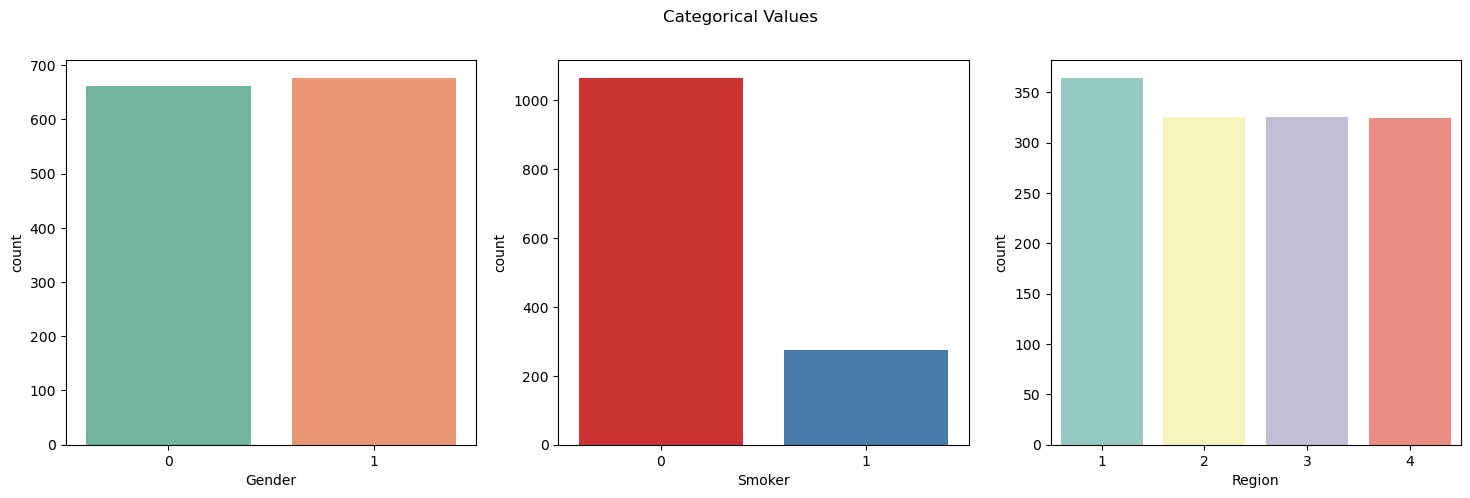

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# Subplot 1: Countplot for 'sex'
plt.subplot(1, 3, 1)
sns.countplot(x='sex', data=medical_df, palette='Set2')  # Added palette for colors
plt.xlabel('Gender')

# Subplot 2: Countplot for 'smoker'
plt.subplot(1, 3, 2)
sns.countplot(x='smoker', data=medical_df, palette='Set1')  # Added palette for colors
plt.xlabel('Smoker')

# Subplot 3: Countplot for 'region'
plt.subplot(1, 3, 3)
sns.countplot(x='region', data=medical_df, palette='Set3')  # Added palette for colors
plt.xlabel('Region')

plt.suptitle('Categorical Values')
plt.show()

## Categorical Values BoxPlot

C:\Users\antol\AppData\Local\Temp\ipykernel_41436\1624045360.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='sex', y='charges', data=medical_df, palette='Set2')  # Added palette for colors
C:\Users\antol\AppData\Local\Temp\ipykernel_41436\1624045360.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='smoker', y='charges', data=medical_df, palette='Set1')  # Added palette for colors
C:\Users\antol\AppData\Local\Temp\ipykernel_41436\1624045360.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], x=

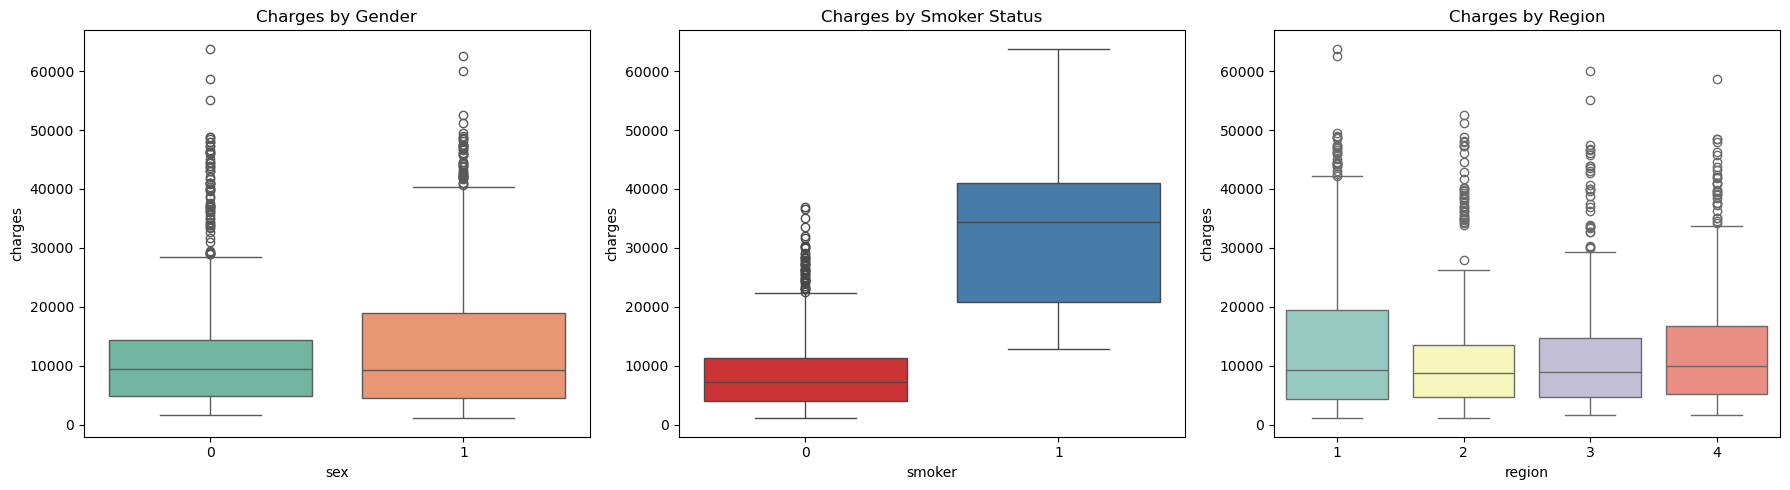

In [14]:
# Box plots to visualize charges
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Box plot for 'sex' vs 'charges' with a color palette
sns.boxplot(ax=axes[0], x='sex', y='charges', data=medical_df, palette='Set2')  # Added palette for colors
axes[0].set_title('Charges by Gender')

# Box plot for 'smoker' vs 'charges' with a color palette
sns.boxplot(ax=axes[1], x='smoker', y='charges', data=medical_df, palette='Set1')  # Added palette for colors
axes[1].set_title('Charges by Smoker Status')

# Box plot for 'region' vs 'charges' with a color palette
sns.boxplot(ax=axes[2], x='region', y='charges', data=medical_df, palette='Set3')  # Added palette for colors
axes[2].set_title('Charges by Region')

plt.tight_layout()
plt.show()

## Age vs Charges ScatterPlot

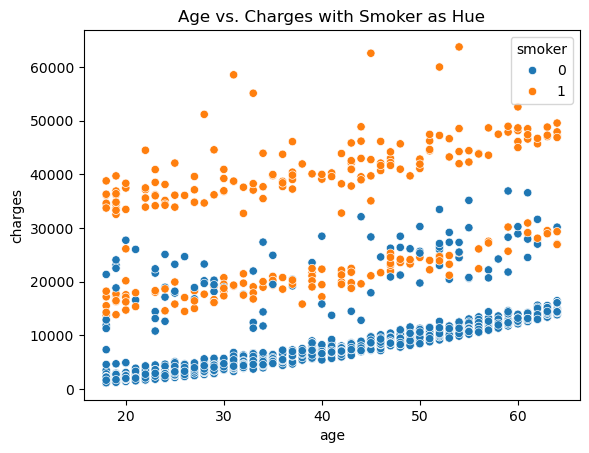

In [15]:
sns.scatterplot(x='age', y='charges', hue='smoker', data = medical_df)
plt.title("Age vs. Charges with Smoker as Hue")
plt.show()

## 3.4 Charge vs BMI Implot

C:\Users\antol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


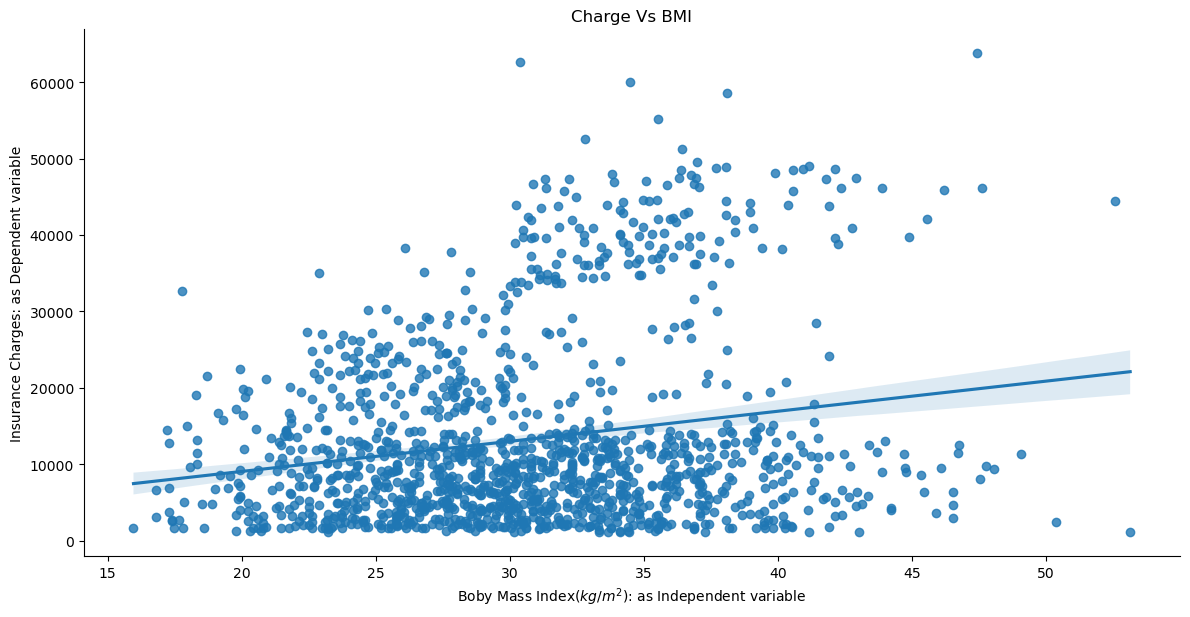

In [16]:
sns.lmplot(x='bmi',y='charges',data = medical_df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

## Heatmap

<Axes: >

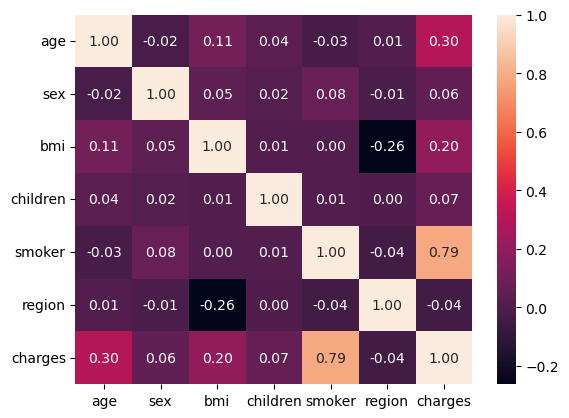

In [17]:
sns.heatmap(medical_df.corr(), annot = True, fmt = ".2f")

The "Smoker" column has a good correlation of 0.79 with the "Charges" compared to other feature columns. Followed by "Age" and "BMI".

People who smoke tend to be charged more.

## Modelling

## Splitting Data

In [18]:
X = medical_df.drop(columns = ['charges'])
y = medical_df['charges']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 4.2 Linear Regression Model


In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

## Accuracy Evaluation


In [21]:
from sklearn.metrics import r2_score, mean_absolute_error
print(f"MAE: {mean_absolute_error(y_test, lr_predict)}")

accuracy = round(r2_score(y_test,lr_predict),1)*100
print(f"{accuracy}%")

MAE: 4174.047876486469
80.0%


## Actual vs Predicted Scatter Plot


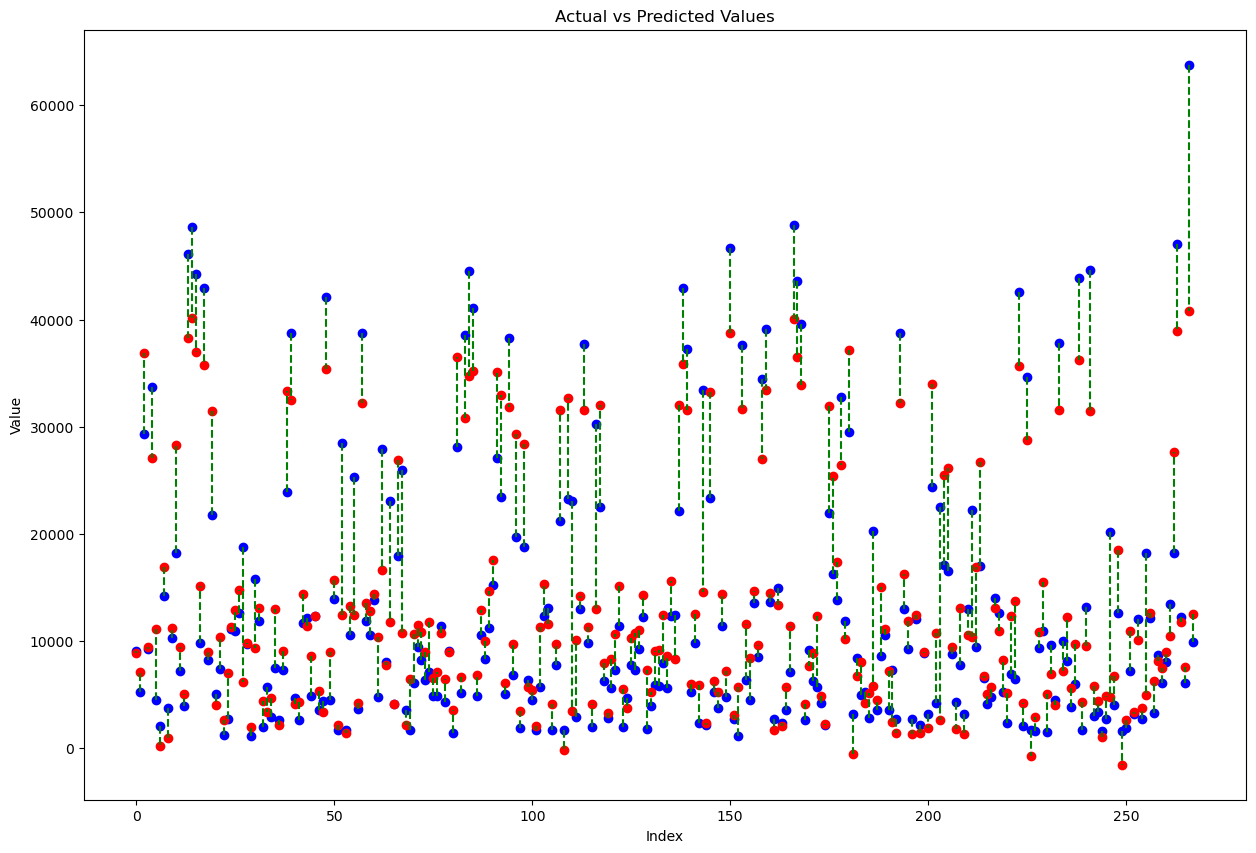

In [22]:
actual = y_test
predicted = lr_predict

plt.figure(figsize = (15, 10))

#Plot the actual values as scatter plot
plt.scatter(range(len(actual)), actual, color = 'blue', label = 'Actual')
#Plot predicted values as a line
plt.scatter(range(len(actual)), predicted, color = 'red', label = 'Predicted')

#Line between actual and predicted point
for i in range(len(actual)):
    plt.plot([i, i], [actual.iloc[i], predicted[i]], color = 'green', linestyle = '--')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.show()

Blue is the Actual.

Red is the Predicted.

Green Line is the difference.

## Random Forest Regressor


In [23]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

## Accuracy Evaluation


In [24]:
print(f"MAE: {mean_absolute_error(y_test, rf_predict)}")

accuracy = round(r2_score(y_test,rf_predict),1)*100
print(f"{accuracy}%")

MAE: 2485.762225217041
90.0%


## Actual vs Predicted Scatter Plot


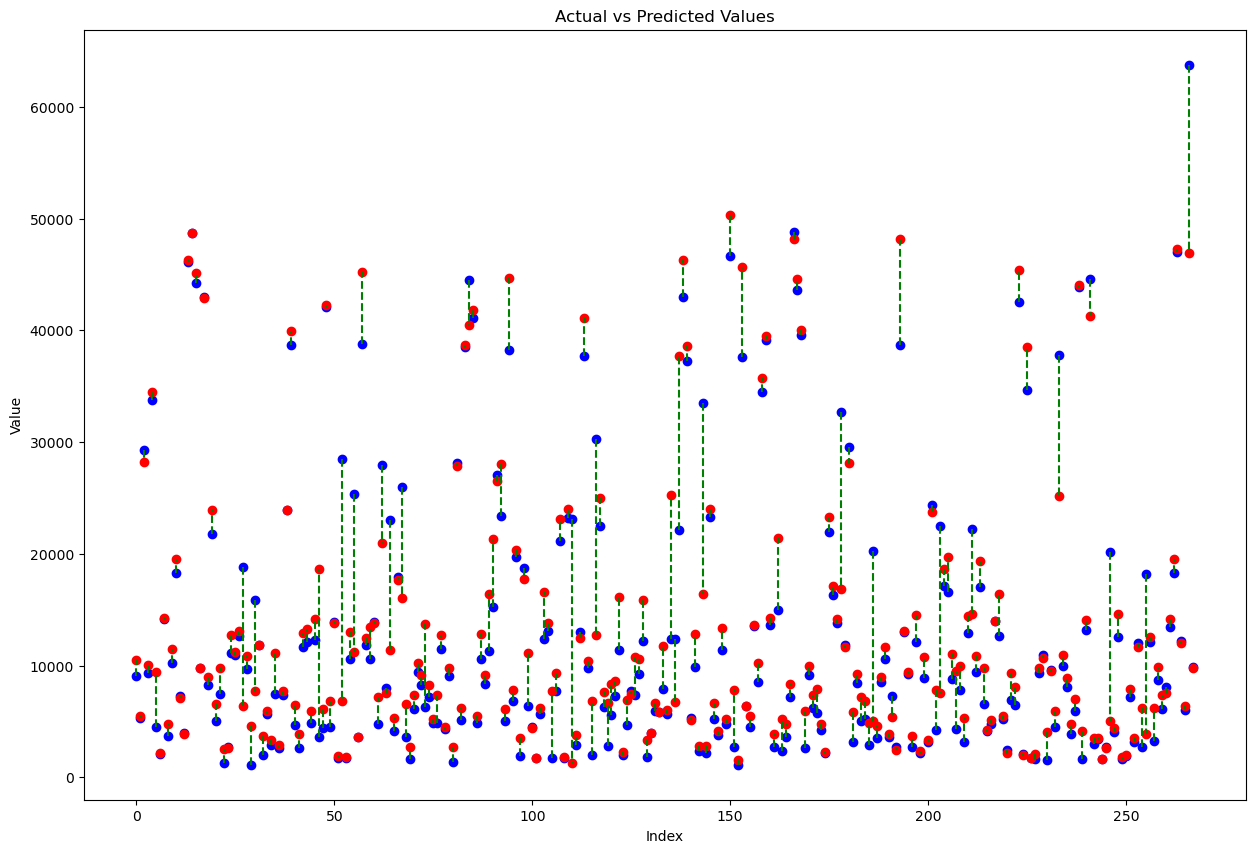

In [25]:
rf_actual = y_test
predicted = rf_predict

plt.figure(figsize = (15, 10))

#Plot the actual values as scatter plot
plt.scatter(range(len(rf_actual)), rf_actual, color = 'blue', label = 'Actual')
#Plot predicted values as a line
plt.scatter(range(len(rf_actual)), predicted, color = 'red', label = 'Predicted')

#Line between actual and predicted point
for i in range(len(rf_actual)):
    plt.plot([i, i], [rf_actual.iloc[i], predicted[i]], color = 'green', linestyle = '--')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.show()

Blue is the Actual.

Red is the Predicted.

Green Line is the difference.